In [32]:
import os
import numpy as np
import re
import matplotlib.pyplot as plt
import colorsys
os.system('bash time_pairwise_distances.sh')

In [33]:
file_list=['time_TCC.txt', 'time_kallisto.txt','time_UMI.txt','time_TCC_l1.txt',
           'time_kallisto_l1.txt','time_UMI_l1.txt']

times=np.zeros((6,1))

cur_time=0
for ind in range(6):
    with open (file_list[ind]) as f:
        for line in f:
            line1=line.split()
            if len(line1)==2 and (line1[0]=='user' or line1[0]=='sys'):
                line2 = re.split("[ms]+", line1[1])
                cur_time += int(line2[0])*60 + float(line2[1])
    times[ind]=cur_time
    cur_time=0

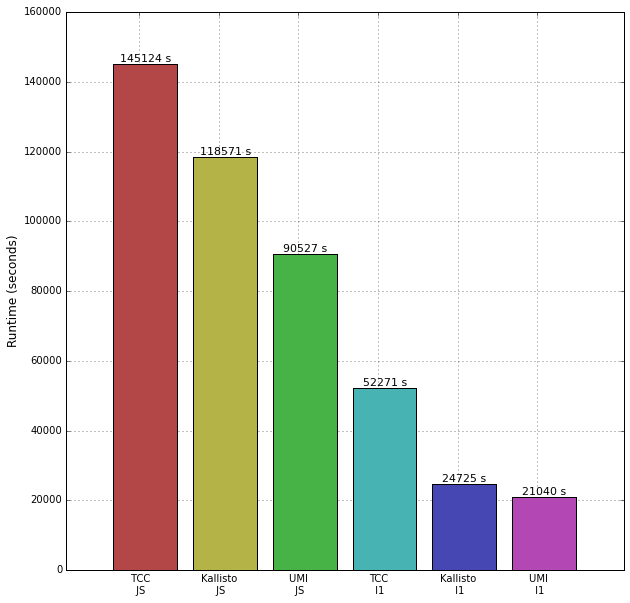

In [35]:
%matplotlib inline
N = 6
HSV_tuples = [(x*1.0/N, 0.6, 0.7) for x in range(N)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

menMeans = times

ind = np.arange(N)
width = 0.45

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width=0.8, color=RGB_tuples,zorder=4, align='center')
methods = [' TCC \n JS', 'Kallisto \n JS','UMI \n JS',
           'TCC \n l1','Kallisto \n l1', 'UMI \n l1']
plt.grid()

xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] -0.2 for patch in rects1]
plt.xticks(xticks_pos, methods, ha='center', rotation=0, size=10)

rects = ax.patches
hts=map(lambda x: str(int(x))+' s',menMeans)
for rect, ht in zip(rects, hts):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, 
            ht, ha='center', va='bottom',fontsize=11)

plt.ylabel('Runtime (seconds)',size=12)
plt.show()